# EDA Analisis

## Import Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np


## Input cleaned Csvs.

In [2]:
coin_id_df = pd.read_csv('../Csvs_cleanned/coin_id.csv')
coins_global_trends_df = pd.read_csv('../Csvs_cleanned/coins_global_trends.csv')
# normalized_tickers_resume_df = pd.read_csv('../Csvs_cleanned/normalized_tickers_resume.csv')
ohlc_prices_df = pd.read_csv('../Csvs_cleanned/ohlc_prices.csv')
prices_df = pd.read_csv('../Csvs_cleanned/prices.csv')
# prices_normalized_df = pd.read_csv('../Csvs_cleanned/prices_normalized.csv')
ranking_coingecko_df = pd.read_csv('../Csvs_cleanned/ranking_coingecko.csv')
tickers_resume_df = pd.read_csv('../Csvs_cleanned/tickers_resume.csv')
top_criptos_df = pd.read_csv('../Csvs_cleanned/top_criptos.csv')

### coin_id_df:

In [3]:
coin_id_df.head(15)

,crip_id,symbol,name
0,arbitrum,arb,arbitrum
1,arb-protocol,arb,arb protocol
2,astar,astr,astar
3,binancecoin,bnb,bnb
4,binance-coin-wormhole,bnb,binance coin (wormhole)
5,binance-peg-cardano,ada,binance-peg cardano
6,binance-peg-dogecoin,doge,binance-peg dogecoin
7,binance-peg-xrp,xrp,binance-peg xrp
8,bitcoin,btc,bitcoin
9,bitrock,brock,bitrock


### coins_global_trends_df:

In [4]:
coins_global_trends_df.head(15)

,crip_id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,bitrock,30987,bitrock,brock,714,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,bitrock,0.000006,0
1,astar,22617,astar,astr,108,https://assets.coingecko.com/coins/images/2261...,https://assets.coingecko.com/coins/images/2261...,https://assets.coingecko.com/coins/images/2261...,astar,0.000003,1
2,sei-network,28205,sei,sei,119,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,0.000006,2
3,sui,26375,sui,sui,88,https://assets.coingecko.com/coins/images/2637...,https://assets.coingecko.com/coins/images/2637...,https://assets.coingecko.com/coins/images/2637...,sui,0.000023,3
4,pendle,15069,pendle,pendle,342,https://assets.coingecko.com/coins/images/1506...,https://assets.coingecko.com/coins/images/1506...,https://assets.coingecko.com/coins/images/1506...,pendle,0.000023,4
5,arbitrum,16547,arbitrum,arb,39,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,arbitrum,0.000038,5
6,bitcoin,1,bitcoin,btc,1,https://assets.coingecko.com/coins/images/1/th...,https://assets.coingecko.com/coins/images/1/sm...,https://assets.coingecko.com/coins/images/1/la...,bitcoin,1.000000,6
7,worldcoin-wld,31069,worldcoin,wld,171,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,0.000053,7


In [5]:
coins_global_trends_df = coins_global_trends_df[['crip_id','name','market_cap_rank','price_btc','score']]

In [6]:
# Ordenar el DataFrame por la columna 'score' de manera descendente
sorted_coins_global_trends_df = coins_global_trends_df.sort_values(by='score', ascending=True)


In [7]:
sorted_coins_global_trends_df

,crip_id,name,market_cap_rank,price_btc,score
0,bitrock,bitrock,714,0.000006,0
1,astar,astar,108,0.000003,1
2,sei-network,sei,119,0.000006,2
3,sui,sui,88,0.000023,3
4,pendle,pendle,342,0.000023,4
5,arbitrum,arbitrum,39,0.000038,5
6,bitcoin,bitcoin,1,1.000000,6
7,worldcoin-wld,worldcoin,171,0.000053,7


### ohlc_prices_df:

Debe conbinarce con price

In [8]:
ohlc_prices_df.head(15)

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,2023-07-24 20:00:00,0.63369,0.63369,0.63369,0.63369,sui-iou
1,2023-07-25 00:00:00,0.63150,0.63213,0.63060,0.63060,sui-iou
2,2023-07-25 04:00:00,0.63713,0.64630,0.63713,0.64564,sui-iou
3,2023-07-25 08:00:00,0.64134,0.64134,0.63399,0.63697,sui-iou
4,2023-07-25 12:00:00,0.63076,0.64002,0.63076,0.63635,sui-iou
5,2023-07-25 16:00:00,0.63517,0.63616,0.63117,0.63117,sui-iou
6,2023-07-25 20:00:00,0.63292,0.63479,0.63052,0.63479,sui-iou
7,2023-07-26 00:00:00,0.63295,0.64080,0.63295,0.63905,sui-iou
8,2023-07-26 04:00:00,0.63756,0.63756,0.62779,0.62779,sui-iou
9,2023-07-26 08:00:00,0.63269,0.63451,0.63086,0.63117,sui-iou


In [9]:
ohlc_prices_df.shape

(6824, 6)

In [10]:
ohlc_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6824 entries, 0 to 6823
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    6824 non-null   object 
 1   open_price   6824 non-null   float64
 2   high_price   6824 non-null   float64
 3   low_price    6824 non-null   float64
 4   close_price  6824 non-null   float64
 5   crip_id      6824 non-null   object 
dtypes: float64(4), object(2)
memory usage: 320.0+ KB


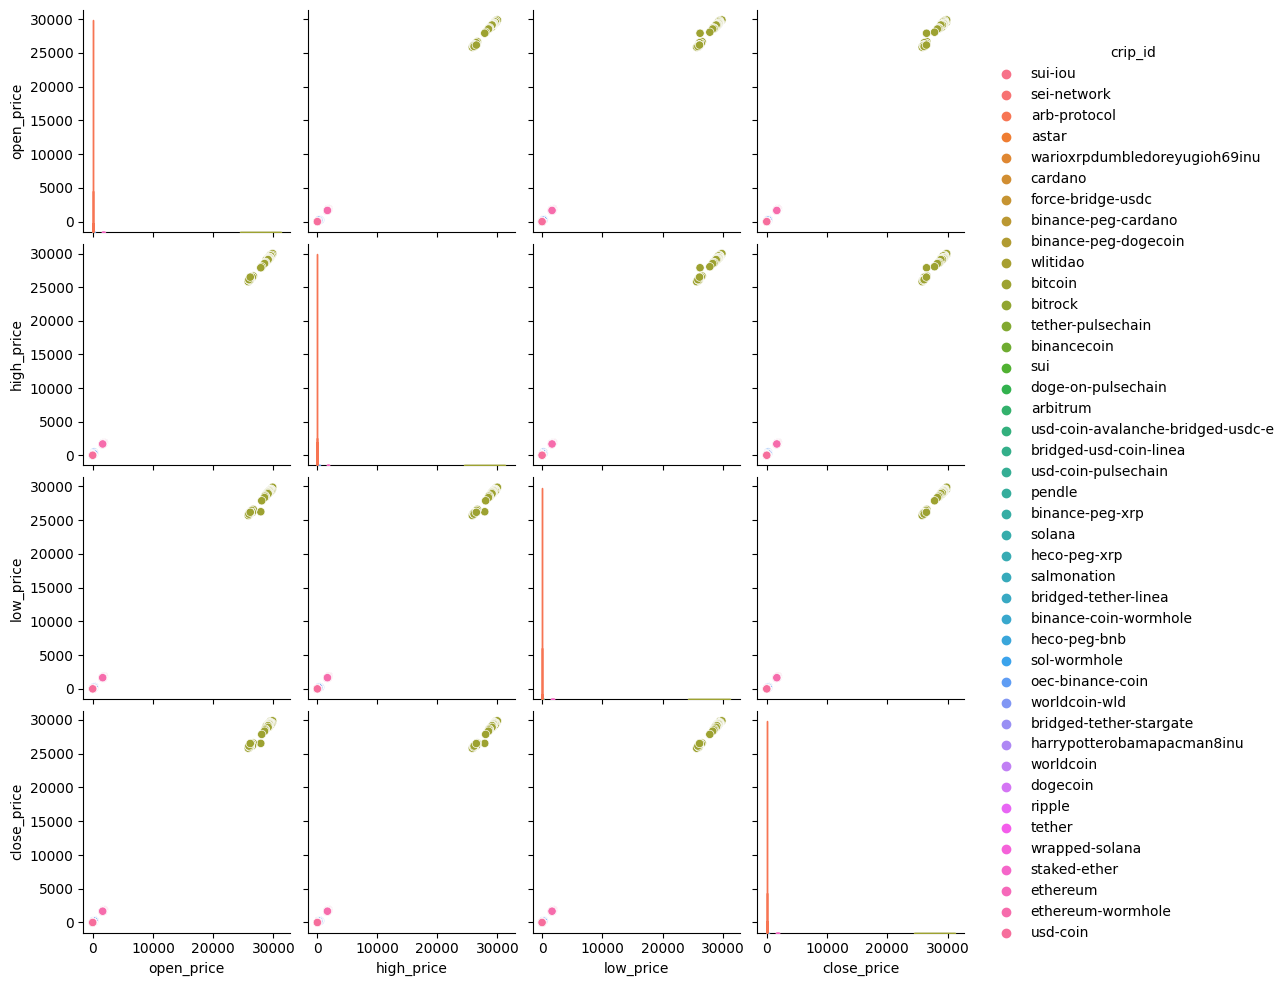

In [11]:
sns.pairplot(ohlc_prices_df, hue='crip_id')

### prices_df:

In [12]:
prices_df.head(15)

,crip_id,timestamp,price,market_cap,total_volume
0,sui-iou,2023-05-02 00:00:00,4.52201,0.0,1313954.60
1,sui-iou,2023-05-03 00:00:00,4.52201,0.0,1313954.60
2,sui-iou,2023-05-04 00:00:00,1.37745,0.0,506308.56
3,sui-iou,2023-05-05 00:00:00,1.33042,0.0,282928.80
4,sui-iou,2023-05-06 00:00:00,1.30606,0.0,2843643.20
5,sui-iou,2023-05-07 00:00:00,1.32708,0.0,9221777.00
6,sui-iou,2023-05-08 00:00:00,1.24563,0.0,637399.50
7,sui-iou,2023-05-09 00:00:00,1.14051,0.0,12948458.00
8,sui-iou,2023-05-10 00:00:00,1.18500,0.0,8312948.50
9,sui-iou,2023-05-11 00:00:00,1.17961,0.0,7149793.50


In [13]:
prices_df.shape

(5382, 5)

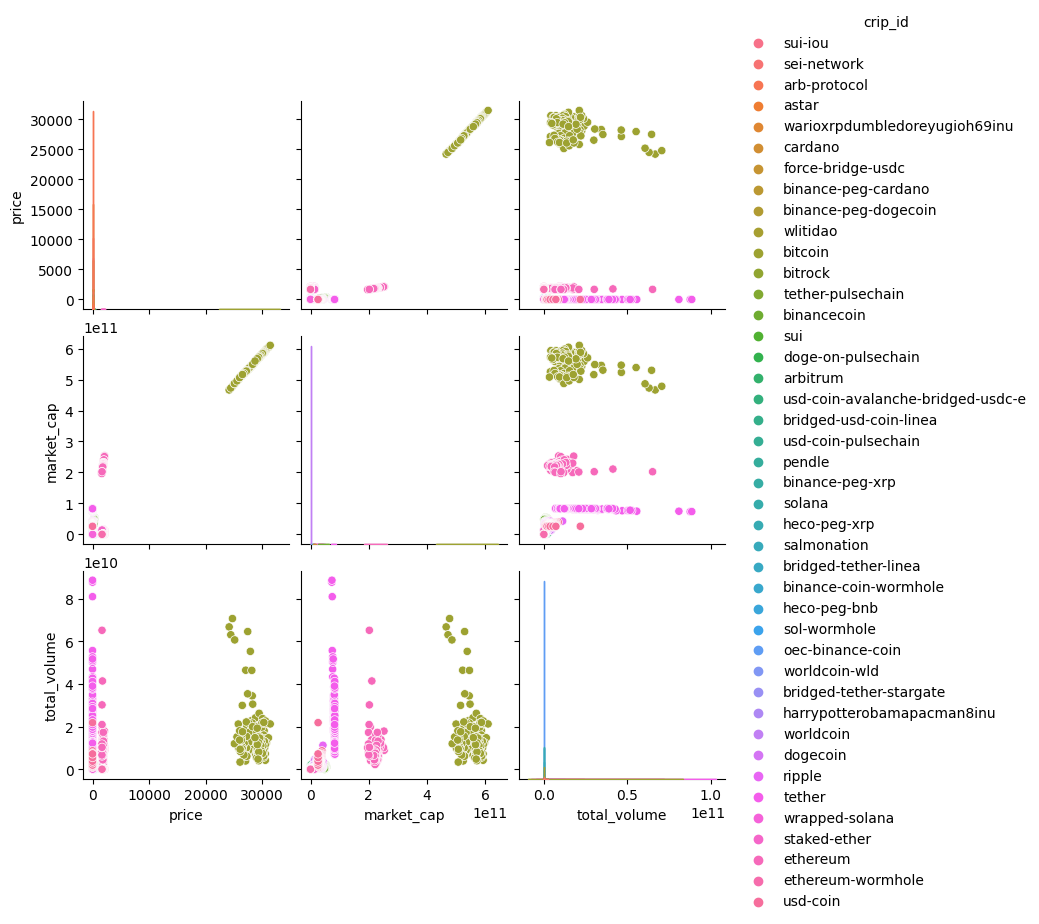

In [14]:
sns.pairplot(prices_df, hue='crip_id')

### Merged Ohlc_prices_df y Prices_df:

##### Merge

In [15]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df = pd.merge(ohlc_prices_df, prices_df, on=['crip_id', 'timestamp'])

In [16]:
merged_df_ohlc_prices_df_and_prices_df = merged_df_ohlc_prices_df_and_prices_df[['crip_id','timestamp','open_price','high_price','low_price','close_price','price','market_cap','total_volume']]

In [17]:
merged_df_ohlc_prices_df_and_prices_df.head(10)

,crip_id,timestamp,open_price,high_price,low_price,close_price,price,market_cap,total_volume
0,sui-iou,2023-07-25 00:00:00,0.63150,0.63213,0.63060,0.63060,0.63667,0.0,636731.80
1,sui-iou,2023-07-26 00:00:00,0.63295,0.64080,0.63295,0.63905,0.63775,0.0,477301.60
2,sui-iou,2023-07-27 00:00:00,0.63493,0.63560,0.63134,0.63134,0.63462,0.0,542868.90
3,sui-iou,2023-07-28 00:00:00,0.63075,0.63374,0.63031,0.63374,0.62949,0.0,352989.12
4,sui-iou,2023-07-29 00:00:00,0.63013,0.63139,0.62914,0.62914,0.63022,0.0,290609.97
5,sui-iou,2023-07-30 00:00:00,0.63644,0.63859,0.63644,0.63836,0.63886,0.0,226065.70
6,sui-iou,2023-07-31 00:00:00,0.61821,0.61821,0.61351,0.61351,0.62032,0.0,314588.38
7,sui-iou,2023-08-01 00:00:00,0.62255,0.62958,0.61955,0.62958,0.63126,0.0,440176.10
8,sui-iou,2023-08-02 00:00:00,0.63750,0.63940,0.63651,0.63940,0.64390,0.0,753900.20
9,sui-iou,2023-08-03 00:00:00,0.61415,0.61466,0.61299,0.61466,0.61429,0.0,441549.20


In [18]:
merged_df_ohlc_prices_df_and_prices_df.shape

(1131, 9)

In [19]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df,hue='crip_id')

##### Guardo merged_df_ohlc_prices_df_and_prices_df:

In [20]:
merged_df_ohlc_prices_df_and_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_df_ohlc_prices_df_and_prices_df.csv', mode='w', index=False)

##### merged_df_ohlc_prices_df_and_prices_df % :

In [21]:
# Calculate percentage change for the specified columns
percentage_columns = ["open_price", "high_price", "low_price", "close_price", "price", 'market_cap', 'total_volume']
for col in percentage_columns:
    col_name = f"{col}_change"
    merged_df_ohlc_prices_df_and_prices_df[col_name] = merged_df_ohlc_prices_df_and_prices_df[col].pct_change() * 100

# Display the resulting DataFrame
print(merged_df_ohlc_prices_df_and_prices_df.head(10))


   crip_id            timestamp  open_price  high_price  low_price  \
0  sui-iou  2023-07-25 00:00:00     0.63150     0.63213    0.63060   
1  sui-iou  2023-07-26 00:00:00     0.63295     0.64080    0.63295   
2  sui-iou  2023-07-27 00:00:00     0.63493     0.63560    0.63134   
3  sui-iou  2023-07-28 00:00:00     0.63075     0.63374    0.63031   
4  sui-iou  2023-07-29 00:00:00     0.63013     0.63139    0.62914   
5  sui-iou  2023-07-30 00:00:00     0.63644     0.63859    0.63644   
6  sui-iou  2023-07-31 00:00:00     0.61821     0.61821    0.61351   
7  sui-iou  2023-08-01 00:00:00     0.62255     0.62958    0.61955   
8  sui-iou  2023-08-02 00:00:00     0.63750     0.63940    0.63651   
9  sui-iou  2023-08-03 00:00:00     0.61415     0.61466    0.61299   

   close_price    price  market_cap  total_volume  open_price_change  \
0      0.63060  0.63667         0.0     636731.80                NaN   
1      0.63905  0.63775         0.0     477301.60           0.229612   
2      0.6313

In [22]:
# Display the resulting DataFrame
merged_df_ohlc_prices_df_and_prices_df.shape

(1131, 16)

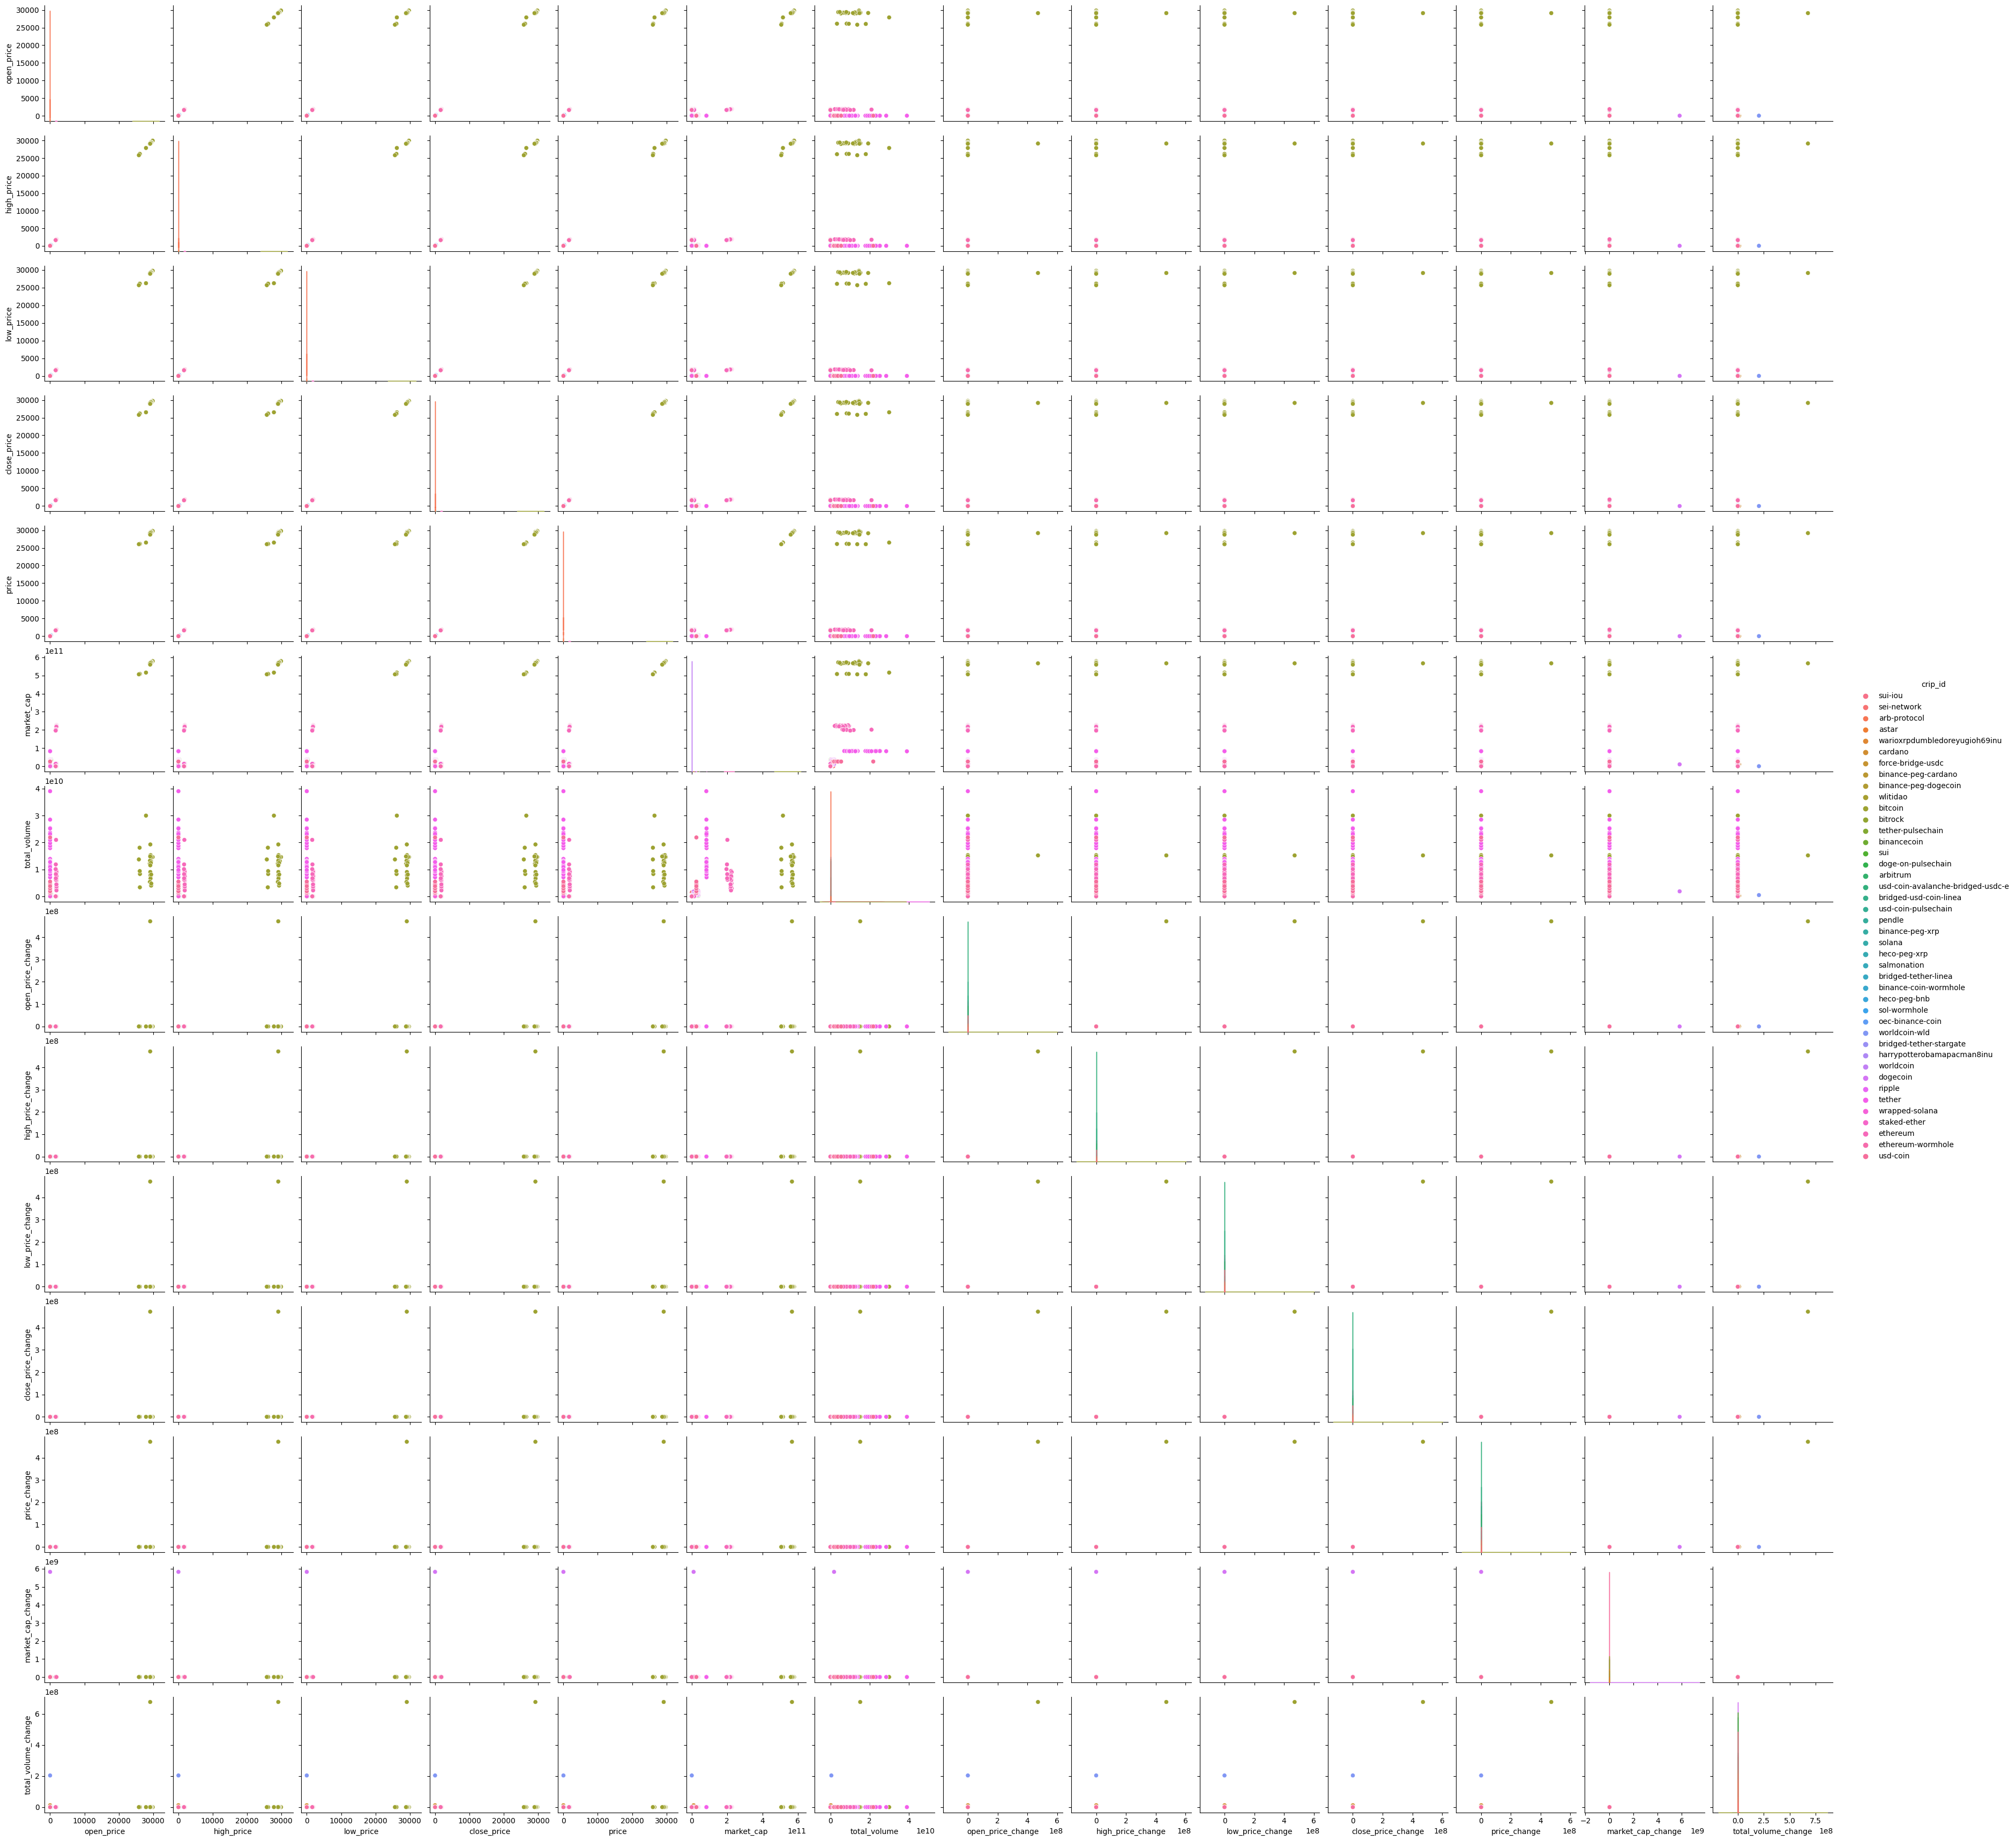

In [23]:
sns.pairplot(merged_df_ohlc_prices_df_and_prices_df, hue='crip_id')

### ranking_coingecko_df:

In [24]:
ranking_coingecko_df.head(15)

,crip_id,block_time_in_minutes,public_notice,watchlist_portfolio_users,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,asset_platform_id,coingecko_rank
0,sui-iou,0,this page tracks the price of sui (iou) across...,1658,0.000,0.000,0.000,0.000,0.000,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
1,sei-network,0,NaN,8796,0.000,0.000,0.000,0.000,0.000,2023-08-23 18:00:40.161000+00:00,75.37,24.63,119.0,NaN,NaN
2,arb-protocol,0,NaN,832,1.624,0.000,6.473,1.000,0.000,2023-08-23 18:00:29.272000+00:00,NaN,NaN,NaN,solana,6169.0
3,astar,0,NaN,34650,43.747,76.509,10.863,40.705,0.008,2023-08-23 18:00:39.751000+00:00,82.00,18.00,108.0,NaN,119.0
4,warioxrpdumbledoreyugioh69inu,0,NaN,51,0.000,0.000,0.000,0.000,0.000,2023-08-22 09:00:24.142000+00:00,NaN,NaN,NaN,ethereum,NaN
5,cardano,0,NaN,724805,62.536,70.270,58.753,72.124,0.023,2023-08-23 18:00:40.597000+00:00,85.58,14.42,8.0,NaN,7.0
6,force-bridge-usdc,0,NaN,53,0.000,0.000,0.000,0.000,0.000,2023-08-23 17:59:38.645000+00:00,NaN,NaN,NaN,godwoken,NaN
7,binance-peg-cardano,0,NaN,1115,7.891,0.000,11.591,26.698,0.023,2023-08-23 18:01:48.227000+00:00,NaN,NaN,NaN,binance-smart-chain,3465.0
8,binance-peg-dogecoin,0,NaN,954,19.673,0.000,70.111,21.239,0.010,2023-08-23 18:01:48.708000+00:00,NaN,NaN,NaN,binance-smart-chain,1211.0
9,wlitidao,0,NaN,218,4.096,12.000,4.073,1.000,0.000,2023-08-23 18:01:19.352000+00:00,NaN,NaN,NaN,polygon-pos,4447.0


In [25]:
ranking_coingecko_df.shape

(44, 15)

In [26]:
# sns.pairplot(ranking_coingecko_df,hue='crip_id')

#### Merged with ranking_congecko_df: Solo se puede por crip_id

In [27]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = pd.merge(merged_df_ohlc_prices_df_and_prices_df, ranking_coingecko_df, on=['crip_id'])

In [28]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,crip_id,timestamp,open_price,high_price,low_price,close_price,price,market_cap,total_volume,open_price_change,...,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,asset_platform_id,coingecko_rank
0,sui-iou,2023-07-25 00:00:00,0.63150,0.63213,0.63060,0.63060,0.63667,0.0,636731.80,NaN,...,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
1,sui-iou,2023-07-26 00:00:00,0.63295,0.64080,0.63295,0.63905,0.63775,0.0,477301.60,0.229612,...,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
2,sui-iou,2023-07-27 00:00:00,0.63493,0.63560,0.63134,0.63134,0.63462,0.0,542868.90,0.312821,...,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
3,sui-iou,2023-07-28 00:00:00,0.63075,0.63374,0.63031,0.63374,0.62949,0.0,352989.12,-0.658340,...,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
4,sui-iou,2023-07-29 00:00:00,0.63013,0.63139,0.62914,0.62914,0.63022,0.0,290609.97,-0.098296,...,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN


In [29]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.shape

(1191, 30)

In [30]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [31]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,crip_id,timestamp,open_price,high_price,low_price,close_price,price,market_cap,total_volume,open_price_change,high_price_change,low_price_change,close_price_change,price_change,market_cap_change,total_volume_change,block_time_in_minutes,public_notice,watchlist_portfolio_users,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,asset_platform_id,coingecko_rank
0,sui-iou,2023-07-25 00:00:00,0.63150,0.63213,0.63060,0.63060,0.63667,0.0,636731.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
1,sui-iou,2023-07-26 00:00:00,0.63295,0.64080,0.63295,0.63905,0.63775,0.0,477301.60,0.229612,1.371553,0.372661,1.339994,0.169633,NaN,-25.038831,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
2,sui-iou,2023-07-27 00:00:00,0.63493,0.63560,0.63134,0.63134,0.63462,0.0,542868.90,0.312821,-0.811486,-0.254364,-1.206478,-0.490788,NaN,13.737079,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
3,sui-iou,2023-07-28 00:00:00,0.63075,0.63374,0.63031,0.63374,0.62949,0.0,352989.12,-0.658340,-0.292637,-0.163145,0.380144,-0.808358,NaN,-34.977097,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN
4,sui-iou,2023-07-29 00:00:00,0.63013,0.63139,0.62914,0.62914,0.63022,0.0,290609.97,-0.098296,-0.370815,-0.185623,-0.725850,0.115967,NaN,-17.671692,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN


In [32]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.drop_duplicates()

In [33]:
# Contar la cantidad de veces que aparece cada valor único en 'Columna'
count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df['crip_id'].value_counts()

In [34]:
print(count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df)

crip_id
ethereum                             60
bitcoin                              60
sui-iou                              30
worldcoin                            30
solana                               30
heco-peg-xrp                         30
binance-coin-wormhole                30
sol-wormhole                         30
worldcoin-wld                        30
dogecoin                             30
usd-coin-pulsechain                  30
ripple                               30
tether                               30
wrapped-solana                       30
staked-ether                         30
ethereum-wormhole                    30
pendle                               30
binance-peg-xrp                      30
bitrock                              30
tether-pulsechain                    30
arb-protocol                         30
astar                                30
cardano                              30
force-bridge-usdc                    30
binance-peg-cardano             

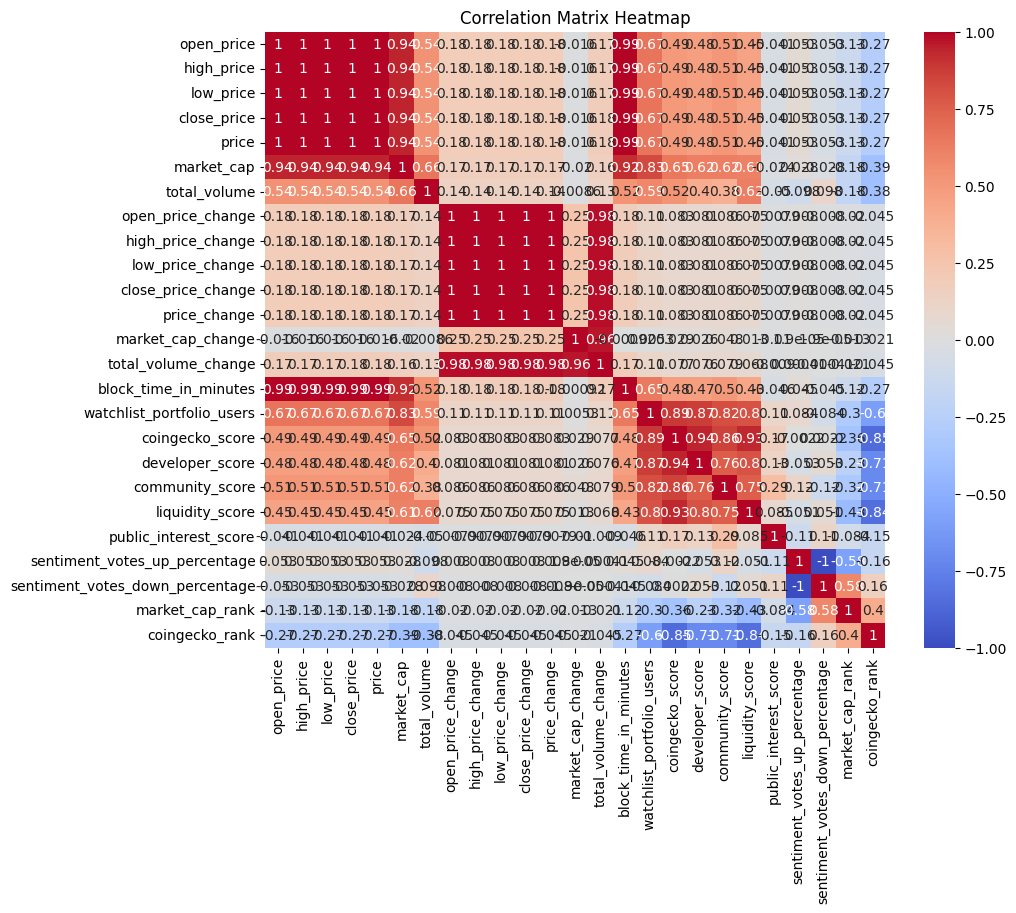

In [35]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



### tickers_resume_df:

In [36]:
tickers_resume_df.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,sui,usdt,0.60383,2.427681e+06,yellow,0.026517,2023-08-23 18:29:46,2023-08-23 18:29:46,2023-08-23 18:29:46,False,False,https://www.bitforex.com/en/spot/sui_usdt,not founded token_info_url #404,sui-iou,tether,bitforex,bitforex,0.000023,0.000359,0.603959,55.353000,871.945,1466220.0
1,sei,krw,208.00000,2.724270e+08,green,0.480769,2023-08-23 18:26:40,2023-08-23 18:26:40,2023-08-23 18:28:34,False,False,https://upbit.com/exchange?code=crix.upbit.krw...,not founded token_info_url #404,sei-network,usd,upbit,upbit,0.000006,0.000093,0.156154,1606.000000,25291.000,42540523.0
2,sei,usdt,0.15240,1.266607e+06,green,0.065660,2023-08-23 18:27:18,2023-08-23 18:27:18,2023-08-23 18:27:18,False,False,https://www.mexc.com/exchange/sei_usdt,not founded token_info_url #404,sei-network,tether,mexc,mxc,0.000006,0.000091,0.152355,7.283320,114.767,192974.0
3,sei,usdt,0.15240,1.702568e+08,green,0.065232,2023-08-23 18:25:15,2023-08-23 18:25:15,2023-08-23 18:25:15,False,False,https://www.binance.com/en/trade/sei_usdt?ref=...,not founded token_info_url #404,sei-network,tether,binance,binance,0.000006,0.000091,0.152526,969.715000,15280.000,25721678.0
4,sei,usdt,0.15249,4.560070e+07,green,0.144206,2023-08-23 18:26:52,2023-08-23 18:26:52,2023-08-23 18:26:52,False,False,https://www.bitget.com/spot/seiusdt?type=spot,not founded token_info_url #404,sei-network,tether,bitget,bitget,0.000006,0.000091,0.152633,259.077000,4083.000,6872800.0
5,sei,usdt,0.15210,7.707660e+06,green,0.196721,2023-08-23 18:28:47,2023-08-23 18:28:47,2023-08-23 18:28:47,False,False,https://www.digifinex.com/en-ww/trade/usdt/sei,not founded token_info_url #404,sei-network,tether,digifinex,digifinex,0.000006,0.000090,0.152175,44.267494,697.317,1172914.0
6,sei,usdt,0.15220,7.767825e+07,green,0.196721,2023-08-23 18:27:02,2023-08-23 18:27:02,2023-08-23 18:27:02,False,False,https://www.huobi.com/en-us/exchange/sei_usdt,not founded token_info_url #404,sei-network,tether,huobi,huobi,0.000006,0.000090,0.152155,440.578000,6942.000,11673243.0
7,sei,usdt,0.15180,4.016783e+07,green,0.392927,2023-08-23 18:27:11,2023-08-23 18:27:11,2023-08-23 18:27:11,False,False,https://www.bitmart.com/trade/en?layout=basic&...,not founded token_info_url #404,sei-network,tether,bitmart,bitmart,0.000006,0.000090,0.151755,230.066000,3625.000,6095667.0
8,sei,krw,206.70000,1.270788e+07,green,0.193330,2023-08-23 18:27:29,2023-08-23 18:27:29,2023-08-23 18:27:29,False,False,https://www.bithumb.com/trade/order/sei_krw,not founded token_info_url #404,sei-network,usd,bithumb,bithumb,0.000006,0.000092,0.155178,74.428000,1173.000,1971982.0
9,sei,try,4.23300,3.627325e+07,green,0.070805,2023-08-23 18:14:16,2023-08-23 18:14:16,2023-08-23 18:14:16,False,False,https://www.binance.com/en/trade/sei_try?ref=3...,not founded token_info_url #404,sei-network,usd,binance,binance,0.000006,0.000092,0.155683,208.793000,3289.000,5539057.0


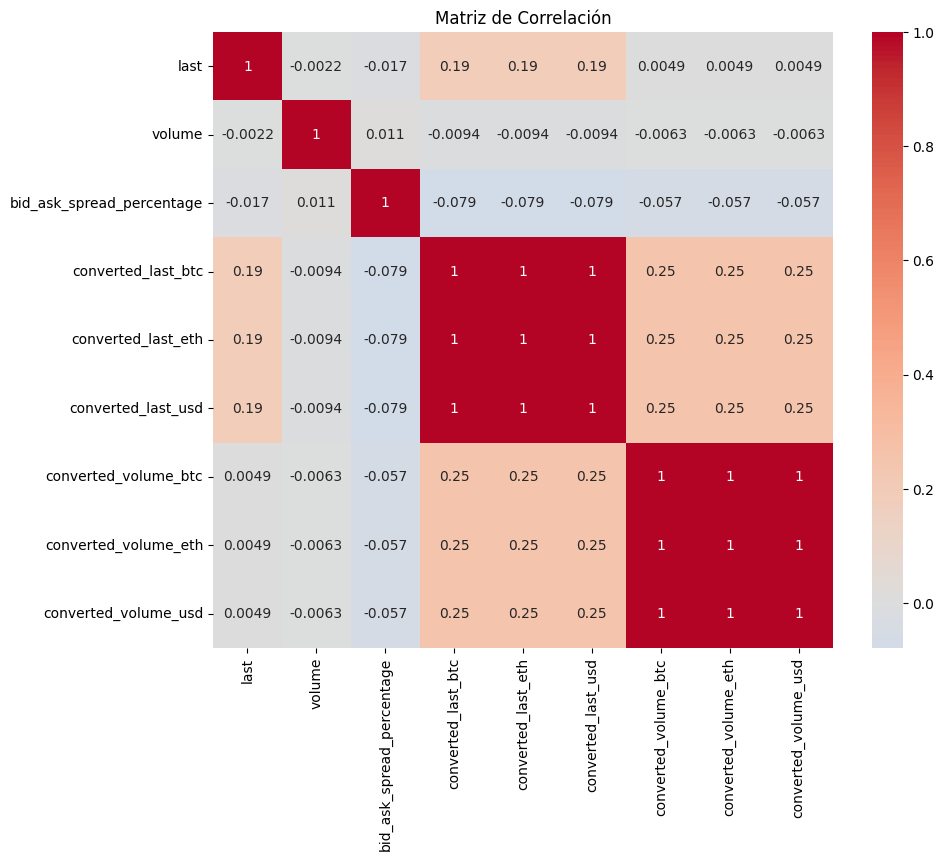

In [37]:
numeric_columns = tickers_resume_df.select_dtypes(include=['float64', 'int64','int32','float32'])  # Seleccionar solo columnas numéricas
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


________________________________

### algunos experimentos para el merge, timestamp mas proximo

In [38]:
# Realizar el merge
merged_result = pd.merge(merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df, tickers_resume_df, on=["crip_id"])

In [39]:
# Imprimir el resultado
merged_result.head(5)

,crip_id,timestamp_x,open_price,high_price,low_price,close_price,price,market_cap,total_volume,open_price_change,high_price_change,low_price_change,close_price_change,price_change,market_cap_change,total_volume_change,block_time_in_minutes,public_notice,watchlist_portfolio_users,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,asset_platform_id,coingecko_rank,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp_y,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,sui-iou,2023-07-25 00:00:00,0.63150,0.63213,0.63060,0.63060,0.63667,0.0,636731.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN,sui,usdt,0.60383,2.427681e+06,yellow,0.026517,2023-08-23 18:29:46,2023-08-23 18:29:46,2023-08-23 18:29:46,False,False,https://www.bitforex.com/en/spot/sui_usdt,not founded token_info_url #404,tether,bitforex,bitforex,0.000023,0.000359,0.603959,55.353,871.945,1466220.0
1,sui-iou,2023-07-26 00:00:00,0.63295,0.64080,0.63295,0.63905,0.63775,0.0,477301.60,0.229612,1.371553,0.372661,1.339994,0.169633,NaN,-25.038831,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN,sui,usdt,0.60383,2.427681e+06,yellow,0.026517,2023-08-23 18:29:46,2023-08-23 18:29:46,2023-08-23 18:29:46,False,False,https://www.bitforex.com/en/spot/sui_usdt,not founded token_info_url #404,tether,bitforex,bitforex,0.000023,0.000359,0.603959,55.353,871.945,1466220.0
2,sui-iou,2023-07-27 00:00:00,0.63493,0.63560,0.63134,0.63134,0.63462,0.0,542868.90,0.312821,-0.811486,-0.254364,-1.206478,-0.490788,NaN,13.737079,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN,sui,usdt,0.60383,2.427681e+06,yellow,0.026517,2023-08-23 18:29:46,2023-08-23 18:29:46,2023-08-23 18:29:46,False,False,https://www.bitforex.com/en/spot/sui_usdt,not founded token_info_url #404,tether,bitforex,bitforex,0.000023,0.000359,0.603959,55.353,871.945,1466220.0
3,sui-iou,2023-07-28 00:00:00,0.63075,0.63374,0.63031,0.63374,0.62949,0.0,352989.12,-0.658340,-0.292637,-0.163145,0.380144,-0.808358,NaN,-34.977097,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN,sui,usdt,0.60383,2.427681e+06,yellow,0.026517,2023-08-23 18:29:46,2023-08-23 18:29:46,2023-08-23 18:29:46,False,False,https://www.bitforex.com/en/spot/sui_usdt,not founded token_info_url #404,tether,bitforex,bitforex,0.000023,0.000359,0.603959,55.353,871.945,1466220.0
4,sui-iou,2023-07-29 00:00:00,0.63013,0.63139,0.62914,0.62914,0.63022,0.0,290609.97,-0.098296,-0.370815,-0.185623,-0.725850,0.115967,NaN,-17.671692,0,this page tracks the price of sui (iou) across...,1658,0.0,0.0,0.0,0.0,0.0,2023-08-23 17:58:53.378000+00:00,NaN,NaN,NaN,NaN,NaN,sui,usdt,0.60383,2.427681e+06,yellow,0.026517,2023-08-23 18:29:46,2023-08-23 18:29:46,2023-08-23 18:29:46,False,False,https://www.bitforex.com/en/spot/sui_usdt,not founded token_info_url #404,tether,bitforex,bitforex,0.000023,0.000359,0.603959,55.353,871.945,1466220.0


In [40]:
merged_result.shape

(63534, 52)

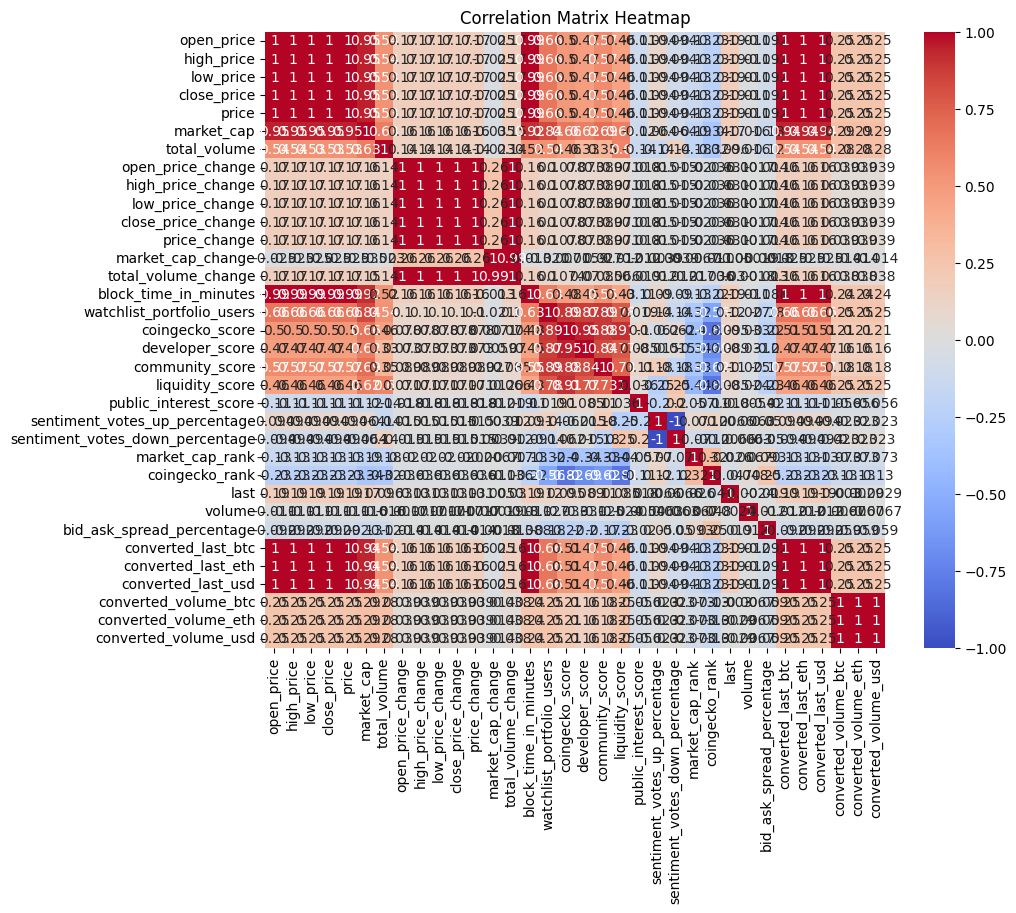

In [41]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_result.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [45]:
merged_result.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_result.csv', mode='w', index=False)

________________________________________

### top_criptos_df:

In [42]:
top_criptos_df.head(15)

,crip_id,market_cap_percentage,total_market_cap,total_volume
0,btc,46.503375,4.185914e+07,1.884094e+06
1,eth,18.225455,6.600502e+08,2.970909e+07
2,bnb,3.014350,5.117592e+09,2.303446e+08
3,xrp,2.534214,2.091513e+12,9.413972e+10


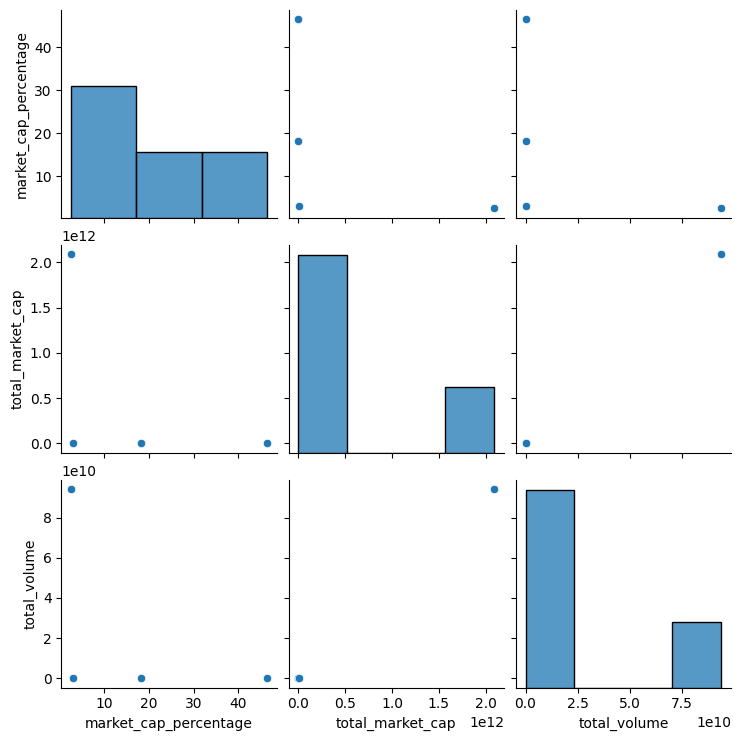

In [43]:
sns.pairplot(top_criptos_df)